## Nuclear Morphology and Chromatin Organization Features

Here we aim to compute a library of features that exhaustively describe the nuclear morphology and chromatin organization for each segmented nucleus in a given image. 

In [1]:
# import libraries
%load_ext autoreload
import sys
sys.path.append("../")

from tifffile import imread
import pandas as pd 
from skimage import measure
import numpy as np
import matplotlib.pyplot as plt
import cv2 as cv

import os
from nmco.nuclear_features import (
    global_morphology as BG,
    img_texture as IT,
    int_dist_features as IDF,
    boundary_local_curvature as BLC
)

In [2]:
# initialising paths
labelled_image_path = os.path.join(os.path.dirname(os.getcwd()),'example_data/008_G10_segmented.tif')
raw_image_path = os.path.join(os.path.dirname(os.getcwd()),'example_data/008_G10_raw.tif')
feature_path = os.path.join(os.path.dirname(os.getcwd()),'example_data/')

Below is an example of the data that can be used. 

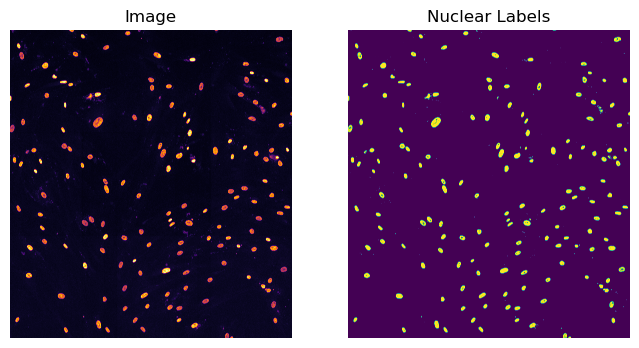

In [3]:
#Read in Images
labelled_image = imread(labelled_image_path)
raw_image = imread(raw_image_path)
labelled_image = labelled_image.astype(int)
raw_image = raw_image.astype(int)

# normalize images
raw_image = cv.normalize(raw_image, None, alpha=0, beta=150, norm_type=cv.NORM_MINMAX, dtype=cv.CV_32F)   

#Visulaise the data

#save plots to show clusters
fig = plt.figure(figsize=(8, 4))
ax0 = fig.add_subplot(121)
ax1 = fig.add_subplot(122)
#show raw image 
ax0.imshow(raw_image,aspect='auto',cmap='inferno') 
ax0.axis('off')
ax0.title.set_text('Image')
#show segmented image
ax1.imshow(labelled_image,aspect='auto',cmap='viridis') 
ax1.axis('off')
ax1.title.set_text('Nuclear Labels')

One can now access each nucleus in the labelled image as well as the raw image. 

Unique labels in labelled_image: [  0   1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17
  18  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35
  36  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53
  54  55  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70  71
  72  73  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88  89
  90  91  92  93  94  95  96  97  98  99 100 101 102 103 104 105 106 107
 108 109 110 111 112 113 114 115 116 117 118 119 120 121 122 123 124 125
 126 127 128 129 130 131 132 133 134 135 136 137 138 139 140 141 142 143
 144 145 146 147 148 149 150 151 152 153 154 155 156 157 158 159 160 161
 162 163 164 165 166 167 168 169 170 171 172 173 174 175 176 177 178 179
 180 181 182 183 184 185 186 187 188 189 190 191 192 193 194 195 196 197
 198 199 200 201 202 203 204 205 206 207 208 209 210 211 212 213 214 215
 216 217 218 219 220 221 222 223 224 225 226 227 228 229 230 231 232 233
 234 235 236 237 2

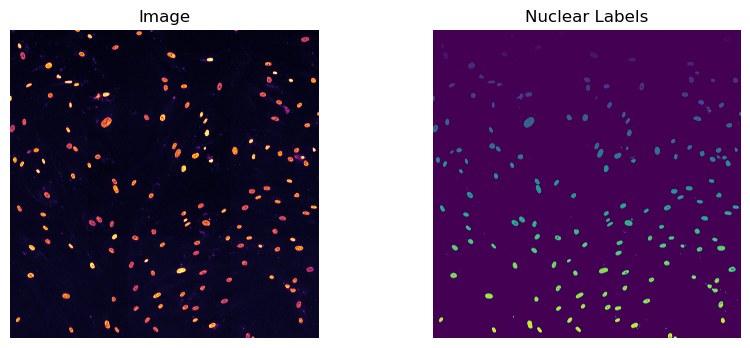

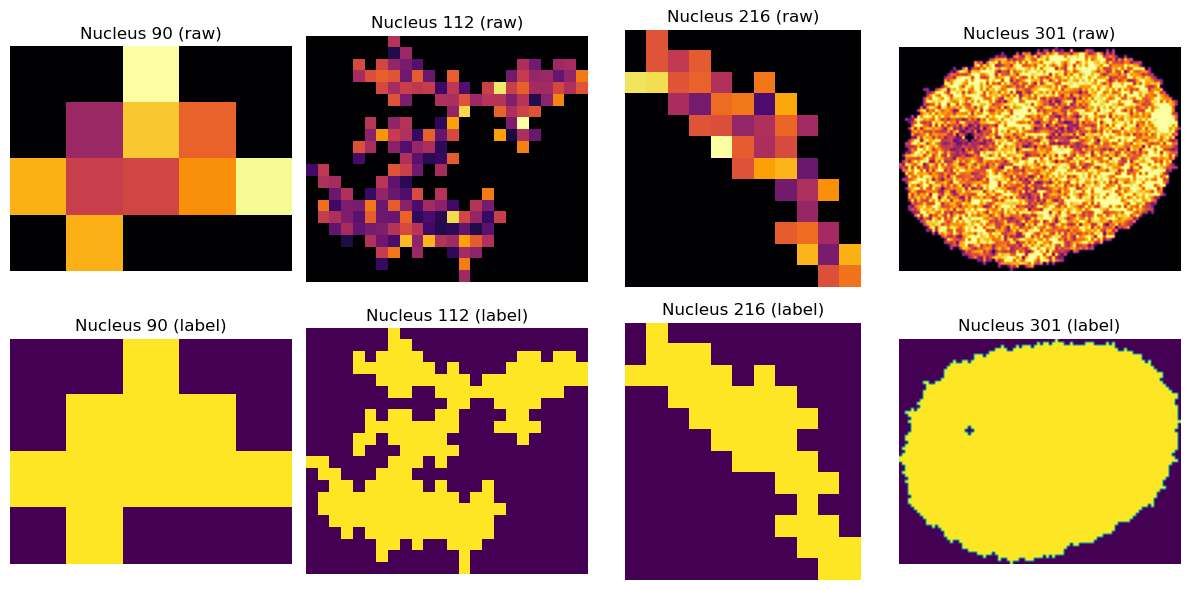

In [4]:
import os
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import cv2 as cv
from tifffile import imread
from skimage import measure

# -- Step 1: Define Paths --
# Adjust these paths as needed
labelled_image_path = os.path.join(os.path.dirname(os.getcwd()),'example_data/008_G10_segmented.tif')
raw_image_path = os.path.join(os.path.dirname(os.getcwd()),'example_data/008_G10_raw.tif')

# -- Step 2: Read Images --
labelled_image = imread(labelled_image_path).astype(int)  # was 0/255
raw_image = imread(raw_image_path).astype(int)

# -- Step 3: Normalize Raw Image (same as your code) --
raw_image = cv.normalize(raw_image, None, alpha=0, beta=150, 
                         norm_type=cv.NORM_MINMAX, dtype=cv.CV_32F)

# -- Step 4: Convert Binary Mask (0,255) → Labeled Image (1,2,3,...) --
# Anything > 0 becomes True (foreground), 0 remains background
binary_mask = labelled_image > 0  
labelled_image = measure.label(binary_mask, connectivity=2)  # each nucleus gets a unique label

print(f"Unique labels in labelled_image: {np.unique(labelled_image)}")
print(f"Total detected nuclei: {labelled_image.max()}")

# -- Step 5: Regionprops with Labeled + Raw Images --
props = measure.regionprops(labelled_image, intensity_image=raw_image)

print(f"Total detected nuclei (props): {len(props)}")

# -- Step 6: Visualize the Entire Labeled Image vs Raw --
fig, (ax0, ax1) = plt.subplots(1,2, figsize=(10,4))
ax0.imshow(raw_image, cmap='inferno')
ax0.set_title("Image")
ax0.axis('off')

ax1.imshow(labelled_image, cmap='viridis')
ax1.set_title("Nuclear Labels")
ax1.axis('off')

plt.show()

# -- Step 7: Plot Individual Nuclei --
# Make sure the indices exist (i.e., < len(props))
nuc_of_interest = [90,112,216,301]
nuc_of_interest = [i for i in nuc_of_interest if i < len(props)]

fig = plt.figure(figsize=(12, 6))

for i, nuc_idx in enumerate(nuc_of_interest):
    # Row 1: intensity_image (raw)
    ax_top = fig.add_subplot(2, len(nuc_of_interest), i+1)
    ax_top.imshow(props[nuc_idx].intensity_image, cmap='inferno')
    ax_top.axis('off')
    ax_top.set_title(f'Nucleus {nuc_idx} (raw)')

    # Row 2: image (label mask)
    ax_bottom = fig.add_subplot(2, len(nuc_of_interest), i+1+len(nuc_of_interest))
    ax_bottom.imshow(props[nuc_idx].image, cmap='viridis')
    ax_bottom.axis('off')
    ax_bottom.set_title(f'Nucleus {nuc_idx} (label)')

plt.tight_layout()
plt.show()

In [9]:
from skimage import measure

# Convert binary mask (0 and 255) to 0 and 1
binary_mask = labelled_image > 0  # Converts 255 to 1, keeps 0 as 0

# Label connected components
labelled_image = measure.label(binary_mask, connectivity=2)  # Now, nuclei should have unique labels

# Check unique labels again
print(f"Unique labels after relabeling: {np.unique(labelled_image)}")

Unique labels after relabeling: [  0   1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17
  18  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35
  36  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53
  54  55  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70  71
  72  73  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88  89
  90  91  92  93  94  95  96  97  98  99 100 101 102 103 104 105 106 107
 108 109 110 111 112 113 114 115 116 117 118 119 120 121 122 123 124 125
 126 127 128 129 130 131 132 133 134 135 136 137 138 139 140 141 142 143
 144 145 146 147 148 149 150 151 152 153 154 155 156 157 158 159 160 161
 162 163 164 165 166 167 168 169 170 171 172 173 174 175 176 177 178 179
 180 181 182 183 184 185 186 187 188 189 190 191 192 193 194 195 196 197
 198 199 200 201 202 203 204 205 206 207 208 209 210 211 212 213 214 215
 216 217 218 219 220 221 222 223 224 225 226 227 228 229 230 231 232 233
 234 235 236 237 23

In [6]:
props_all = measure.regionprops(labelled_image, intensity_image=raw_image)

# Filter out suspiciously small or large objects
props_filtered = []
for p in props_all:
    if 100 < p.area < 2000:  # Example area bounds
        props_filtered.append(p)

print(f"Total objects before filtering: {len(props_all)}")
print(f"Total objects after filtering:  {len(props_filtered)}")

Total objects before filtering: 440
Total objects after filtering:  35


In [7]:
props = measure.regionprops(labelled_image)
print(f"Total detected nuclei: {len(props)}")

Total detected nuclei: 440


In [8]:
print(f"Total detected nuclei: {len(props)}")

Total detected nuclei: 440


In [16]:
print(f"Unique labels in labelled_image: {np.unique(labelled_image)}")

Unique labels in labelled_image: [  0   1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17
  18  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35
  36  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53
  54  55  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70  71
  72  73  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88  89
  90  91  92  93  94  95  96  97  98  99 100 101 102 103 104 105 106 107
 108 109 110 111 112 113 114 115 116 117 118 119 120 121 122 123 124 125
 126 127 128 129 130 131 132 133 134 135 136 137 138 139 140 141 142 143
 144 145 146 147 148 149 150 151 152 153 154 155 156 157 158 159 160 161
 162 163 164 165 166 167 168 169 170 171 172 173 174 175 176 177 178 179
 180 181 182 183 184 185 186 187 188 189 190 191 192 193 194 195 196 197
 198 199 200 201 202 203 204 205 206 207 208 209 210 211 212 213 214 215
 216 217 218 219 220 221 222 223 224 225 226 227 228 229 230 231 232 233
 234 235 236 237 2

In [17]:
valid_nuclei = min(len(props), 4)  # Ensure we don't go out of bounds
nuc_of_interest = np.random.choice(len(props), valid_nuclei, replace=False)

(-0.5, 93.5, 74.5, -0.5)

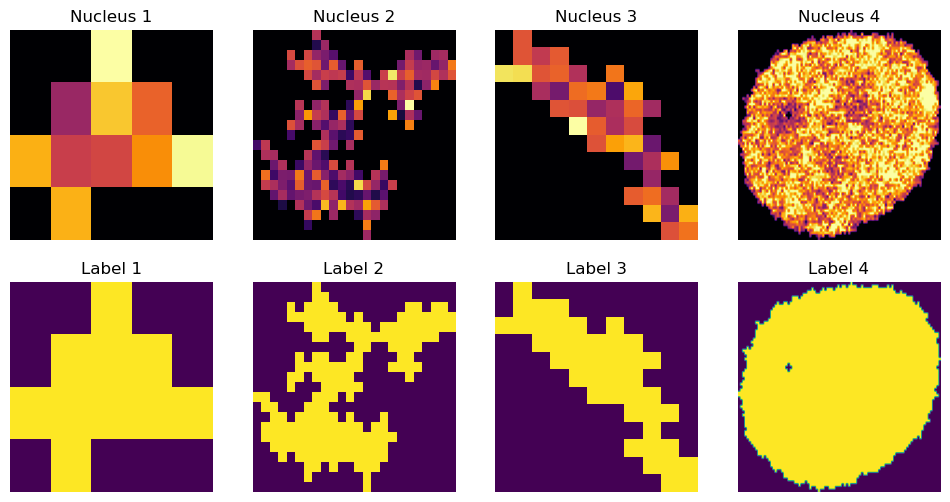

In [18]:
#Get indexing for the individual nuclei in the image
props = measure.regionprops(labelled_image,raw_image)

fig = plt.figure(figsize=(12, 6))
ax0 = fig.add_subplot(241)
ax1 = fig.add_subplot(242)
ax2 = fig.add_subplot(243)
ax3 = fig.add_subplot(244)
ax4 = fig.add_subplot(245)
ax5 = fig.add_subplot(246)
ax6 = fig.add_subplot(247)
ax7 = fig.add_subplot(248)

# Selecting a few nuclei 
nuc_of_interest = [90,112,216,301]
#show raw image 
ax0.imshow(props[nuc_of_interest[0]].intensity_image,aspect='auto',cmap='inferno') 
ax0.title.set_text('Nucleus 1')
ax0.axis('off')
ax1.imshow(props[nuc_of_interest[1]].intensity_image,aspect='auto',cmap='inferno') 
ax1.title.set_text('Nucleus 2')
ax1.axis('off')
ax2.imshow(props[nuc_of_interest[2]].intensity_image,aspect='auto',cmap='inferno') 
ax2.title.set_text('Nucleus 3')
ax2.axis('off')
ax3.imshow(props[nuc_of_interest[3]].intensity_image,aspect='auto',cmap='inferno') 
ax3.title.set_text('Nucleus 4')
ax3.axis('off')

#show segmented image
ax4.imshow(props[nuc_of_interest[0]].image,aspect='auto',cmap='viridis') 
ax4.title.set_text('Label 1')
ax4.axis('off')
ax5.imshow(props[nuc_of_interest[1]].image,aspect='auto',cmap='viridis') 
ax5.title.set_text('Label 2')
ax5.axis('off')
ax6.imshow(props[nuc_of_interest[2]].image,aspect='auto',cmap='viridis') 
ax6.title.set_text('Label 3')
ax6.axis('off')
ax7.imshow(props[nuc_of_interest[3]].image,aspect='auto',cmap='viridis') 
ax7.title.set_text('Label 4')
ax7.axis('off')

#### Basic Features

Scikit provides several informative features that describe "region properties". One can extract such built in features if required. For more information on how the features were computed check out the documentation(https://scikit-image.org/docs/dev/api/skimage.measure.html#skimage.measure.regionprops_table). 

In [19]:
#Measure scikit's built in features
propstable = pd.DataFrame(measure.regionprops_table(labelled_image,raw_image,cache=True,
                               properties=['label', 'area','perimeter','bbox_area','convex_area',
                                           'equivalent_diameter','major_axis_length','minor_axis_length',
                                           'eccentricity','orientation',
                                            'centroid','weighted_centroid',
                                           'weighted_moments','weighted_moments_normalized',
                                           'weighted_moments_central','weighted_moments_hu',
                                            'moments','moments_normalized','moments_central','moments_hu']))
propstable.iloc[nuc_of_interest]

,label,area,perimeter,bbox_area,convex_area,equivalent_diameter,major_axis_length,minor_axis_length,eccentricity,orientation,...,moments_central-3-1,moments_central-3-2,moments_central-3-3,moments_hu-0,moments_hu-1,moments_hu-2,moments_hu-3,moments_hu-4,moments_hu-5,moments_hu-6
90,91,10.0,9.278175,20.0,11.0,3.568248,4.593685,3.126988,0.732549,-1.367423,...,-2.912000e+00,2.386400e+00,-1.942400e+00,0.193000,0.005009,0.002274,7.451200e-05,-6.591481e-09,-3.636464e-06,2.995615e-08
112,113,181.0,116.781746,504.0,342.0,15.180789,25.225334,16.994004,0.739016,-0.796186,...,-5.760330e+04,-4.398858e+05,-6.538385e+06,0.319445,0.014400,0.003695,1.318336e-03,2.767863e-06,1.485198e-04,-8.977147e-07
216,217,42.0,26.591883,132.0,58.0,7.312733,15.461687,4.528790,0.956142,0.721980,...,5.387142e+03,6.195407e+03,8.183850e+04,0.386270,0.105774,0.010553,2.196066e-03,7.431069e-06,2.079464e-04,7.519608e-06
301,302,5288.0,335.652850,7050.0,5565.0,82.054194,94.748858,71.381576,0.657589,-1.320956,...,-2.155171e+08,-1.243984e+09,-1.749201e+11,0.166328,0.002105,0.000020,3.915546e-07,1.894170e-13,4.803887e-09,-1.067813e-12


#### Global Morphology features

We compute the features that describe global morphology of a given object. In addition to basic features in Scikit's measure module, we introduce the following two types of measures 
1. Calliper distances
2. Distribution features of radii(centroid to boundary) distances

Below are features computed for 4 nuclei

In [20]:
BG_feat = pd.concat([BG.measure_global_morphometrics(props[nuc_of_interest[0]].image),
                     BG.measure_global_morphometrics(props[nuc_of_interest[1]].image),
                     BG.measure_global_morphometrics(props[nuc_of_interest[2]].image),
                     BG.measure_global_morphometrics(props[nuc_of_interest[3]].image)])
BG_feat

,min_calliper,max_calliper,smallest_largest_calliper,min_radius,max_radius,med_radius,avg_radius,mode_radius,d25_radius,d75_radius,...,equivalent_diameter,major_axis_length,minor_axis_length,eccentricity,orientation,concavity,solidity,a_r,shape_factor,area_bbarea
0,3,5,0.600000,0.412311,2.137756,1.428059,1.408038,0.412311,1.148269,1.733661,...,3.568248,4.593685,3.126988,0.732549,-1.367423,0.090909,0.909091,0.680715,0.685039,0.500000
0,12,22,0.545455,0.549495,14.230279,7.265210,7.206593,0.549495,5.419440,9.315791,...,15.180789,25.225334,16.994004,0.739016,-0.796186,0.470760,0.529240,0.673688,5.995998,0.359127
0,4,15,0.266667,1.119301,6.942998,3.947559,3.923488,1.119301,2.528153,5.408394,...,7.312733,15.461687,4.528790,0.956142,0.721980,0.275862,0.724138,0.292904,1.339797,0.318182
0,72,95,0.757895,22.222540,48.811140,41.124489,40.331635,22.222540,36.352477,44.639641,...,82.054194,94.748858,71.381576,0.657589,-1.320956,0.049775,0.950225,0.753377,1.695428,0.750071


#### Local Boundary Features

We also compute features that the describe local curvature of a given object.

Approach:
For a given object we obtain the edge pixels and compute the local curvature of each point on the curve +/- a given stepsize. Larger steps give a smoother curvature. 
We define the local curvature between 3 points as the inverse of the radius of their circumcircle and if the circumcenter is inside the object then the sign of curvature is positive. 

Below is the radius of curvature for Nucleus 1

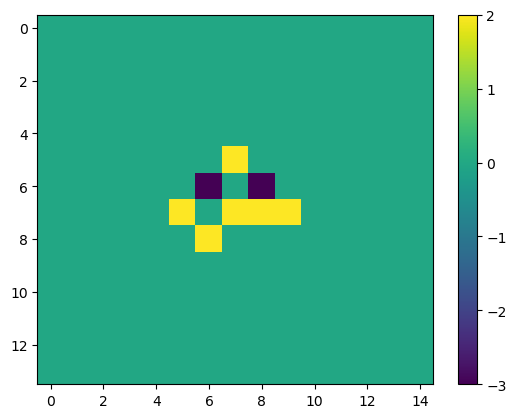

In [21]:
r_c= BLC.local_radius_curvature(props[nuc_of_interest[0]].image,step=5,show_boundary=True)
#calculate local curvature features
local_curvature=[np.divide(1,r_c[x]) if r_c[x]!=0 else 0 for x in range(len(r_c))]

Now that we have the local curvature for all points on the boundary, we compute features that describe it such as average and standard deviation of curature (positive and negative), number of time the polarity changes etc. Feature names are self-descriptive.  

In [22]:
#compute local and global features
global_features = BLC.global_curvature_features(np.array(local_curvature))
pd.DataFrame([global_features])

,avg_curvature,std_curvature,npolarity_changes,max_posi_curv,avg_posi_curv,med_posi_curv,std_posi_curv,sum_posi_curv,len_posi_curv,max_neg_curv,avg_neg_curv,med_neg_curv,std_neg_curv,sum_neg_curv,len_neg_curv
0,0.222568,0.309465,3,0.5,0.399763,0.387426,0.045819,2.39858,6,0.309017,0.309017,0.309017,0.0,0.618034,2


We also check to see if there are any prominant jumps in local curvature along the boundary. To do so we identify the presence of prominent peaks.  

,num_prominant_pos_curv,prominance_prominant_pos_curv,width_prominant_pos_curv,prominant_pos_curv,num_prominant_neg_curv,prominance_prominant_neg_curv,width_prominant_neg_curv,prominant_neg_curv
0,0,NaN,NaN,NaN,0,NaN,NaN,NaN


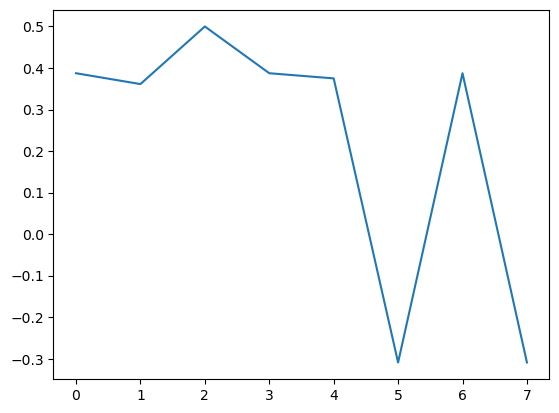

In [23]:
prominant_features = BLC.prominant_curvature_features(local_curvature,show_plot=True)
pd.DataFrame([prominant_features])


Below are the features computed for 4 nuclei. 

In [24]:
BLC_feat= pd.concat([BLC.measure_curvature_features(props[nuc_of_interest[0]].image,step=5),
                     BLC.measure_curvature_features(props[nuc_of_interest[1]].image,step=5),
                     BLC.measure_curvature_features(props[nuc_of_interest[2]].image,step=5),
                     BLC.measure_curvature_features(props[nuc_of_interest[3]].image,step=5)])
BLC_feat

,avg_curvature,std_curvature,npolarity_changes,max_posi_curv,avg_posi_curv,med_posi_curv,std_posi_curv,sum_posi_curv,len_posi_curv,max_neg_curv,...,prominance_prominant_pos_curv,width_prominant_pos_curv,prominant_pos_curv,num_prominant_neg_curv,prominance_prominant_neg_curv,width_prominant_neg_curv,prominant_neg_curv,frac_peri_w_posi_curvature,frac_peri_w_neg_curvature,frac_peri_w_polarity_changes
0,0.222568,0.309465,3,0.500000,0.399763,0.387426,0.045819,2.398580,6,0.309017,...,NaN,NaN,NaN,0,NaN,NaN,NaN,0.646679,0.215560,0.323339
0,0.005161,0.214686,40,0.320000,0.239696,0.240253,0.049504,10.067222,42,0.387426,...,0.621749,5.816614,0.296337,1,0.663491,9.601179,-0.354474,0.359645,0.470964,0.342519
0,-0.032520,0.194375,13,0.387426,0.267366,0.269285,0.066009,1.871562,7,0.309017,...,NaN,NaN,NaN,0,NaN,NaN,NaN,0.263238,0.714504,0.488871
0,0.021216,0.075716,108,0.324414,0.069826,0.067891,0.040706,10.962672,157,0.500000,...,0.234268,5.903371,0.128659,4,0.240162,6.037504,-0.107843,0.467745,0.244300,0.321761


#### Intensity Features

DNA packing levels are encoded in their fluroscent intensity. Therefore we compute features that describe the intensity distribution of pixels within the nucleus.

These include features that describe the intensity distribution, entropy and heterocromatin ratios 

Below are the features computed for 4 nuclei. 

In [25]:
Int_feat= pd.concat([IDF.measure_intensity_features(props[nuc_of_interest[0]].image,props[nuc_of_interest[0]].intensity_image),
                     IDF.measure_intensity_features(props[nuc_of_interest[1]].image,props[nuc_of_interest[1]].intensity_image),
                     IDF.measure_intensity_features(props[nuc_of_interest[2]].image,props[nuc_of_interest[2]].intensity_image),
                     IDF.measure_intensity_features(props[nuc_of_interest[3]].image,props[nuc_of_interest[3]].intensity_image)])
Int_feat

,int_min,int_d25,int_median,int_d75,int_max,int_mean,int_mode,int_sd,kurtosis,skewness,entropy,i80_i20,nhigh_nlow,hc_area_ec_area,hc_area_nuc_area,hc_content_ec_content,hc_content_dna_content
0,36.058594,50.499543,67.903412,74.017511,86.310371,64.013733,36.058594,15.953622,-1.115884,-0.236327,2.660964,1.594953,1.00000,0.250000,0.200000,0.364599,0.267184
0,16.108950,45.323872,66.610207,82.636757,150.000000,65.859604,91.567863,27.691719,-0.062583,0.378757,3.558459,2.136064,1.00000,0.190789,0.160221,0.365662,0.267755
0,24.039825,48.642138,64.899292,73.767452,106.092926,63.638672,65.024033,19.055622,-0.498870,0.061812,2.587828,1.678362,1.00000,0.235294,0.190476,0.379149,0.274915
0,15.191119,89.878120,116.443123,147.431900,150.000000,113.906204,150.000000,30.828615,-0.863696,-0.419184,7.128867,1.775016,1.18242,0.366408,0.268154,0.544047,0.352351


#### Image Textures
Here we compute features that describe the texture of the image.

These include the GLCM features at various lengths as well as image moments. 

Below are the features computed for 4 nuclei. 

In [26]:
Int_Text= pd.concat([IT.measure_texture_features(props[nuc_of_interest[0]].image,props[nuc_of_interest[0]].intensity_image),
                     IT.measure_texture_features(props[nuc_of_interest[1]].image,props[nuc_of_interest[1]].intensity_image),
                     IT.measure_texture_features(props[nuc_of_interest[2]].image,props[nuc_of_interest[2]].intensity_image),
                     IT.measure_texture_features(props[nuc_of_interest[3]].image,props[nuc_of_interest[3]].intensity_image)])
Int_Text

,contrast_1,contrast_5,contrast_20,dissimilarity_1,dissimilarity_5,dissimilarity_20,homogeneity_1,homogeneity_5,homogeneity_20,asm_1,...,moments_central-3-1,moments_central-3-2,moments_central-3-3,moments_hu-0,moments_hu-1,moments_hu-2,moments_hu-3,moments_hu-4,moments_hu-5,moments_hu-6
0,2199.018750,0.000000,0.000000,37.691667,0.000000,0.000000,0.161670,0.000000,0.000000,0.087899,...,-2.912000e+00,2.386400e+00,-1.942400e+00,0.193000,0.005009,0.002274,7.451200e-05,-6.591481e-09,-3.636464e-06,2.995615e-08
0,1595.591049,2731.309321,1820.623512,23.298599,36.927542,24.823512,0.523232,0.359739,0.599859,0.267062,...,-5.760330e+04,-4.398858e+05,-6.538385e+06,0.319445,0.014400,0.003695,1.318336e-03,2.767863e-06,1.485198e-04,-8.977147e-07
0,1160.656129,2248.394120,0.000000,19.301067,33.364628,0.000000,0.559473,0.416084,0.000000,0.306222,...,5.387142e+03,6.195407e+03,8.183850e+04,0.386270,0.105774,0.010553,2.196066e-03,7.431069e-06,2.079464e-04,7.519608e-06
0,1372.747215,2616.351995,4747.427722,25.276470,35.907135,52.527141,0.299534,0.217550,0.102270,0.052345,...,-2.155171e+08,-1.243984e+09,-1.749201e+11,0.166328,0.002105,0.000020,3.915546e-07,1.894170e-13,4.803887e-09,-1.067813e-12


### Compilation

If interested, one can combine all the different categories of features for a consolidated feature set. 

In [27]:
features = pd.concat([pd.DataFrame(nuc_of_interest, columns=["label"]),
           BG_feat.reset_index(drop=True), 
           BLC_feat.reset_index(drop=True), 
           Int_feat.reset_index(drop=True),
           Int_Text.reset_index(drop=True)], axis=1)

features

,label,min_calliper,max_calliper,smallest_largest_calliper,min_radius,max_radius,med_radius,avg_radius,mode_radius,d25_radius,...,moments_central-3-1,moments_central-3-2,moments_central-3-3,moments_hu-0,moments_hu-1,moments_hu-2,moments_hu-3,moments_hu-4,moments_hu-5,moments_hu-6
0,90,3,5,0.600000,0.412311,2.137756,1.428059,1.408038,0.412311,1.148269,...,-2.912000e+00,2.386400e+00,-1.942400e+00,0.193000,0.005009,0.002274,7.451200e-05,-6.591481e-09,-3.636464e-06,2.995615e-08
1,112,12,22,0.545455,0.549495,14.230279,7.265210,7.206593,0.549495,5.419440,...,-5.760330e+04,-4.398858e+05,-6.538385e+06,0.319445,0.014400,0.003695,1.318336e-03,2.767863e-06,1.485198e-04,-8.977147e-07
2,216,4,15,0.266667,1.119301,6.942998,3.947559,3.923488,1.119301,2.528153,...,5.387142e+03,6.195407e+03,8.183850e+04,0.386270,0.105774,0.010553,2.196066e-03,7.431069e-06,2.079464e-04,7.519608e-06
3,301,72,95,0.757895,22.222540,48.811140,41.124489,40.331635,22.222540,36.352477,...,-2.155171e+08,-1.243984e+09,-1.749201e+11,0.166328,0.002105,0.000020,3.915546e-07,1.894170e-13,4.803887e-09,-1.067813e-12


In [28]:
all_features = pd.DataFrame()
pd.concat([all_features, BG_feat.reset_index(drop=True)], axis=0)

,min_calliper,max_calliper,smallest_largest_calliper,min_radius,max_radius,med_radius,avg_radius,mode_radius,d25_radius,d75_radius,...,equivalent_diameter,major_axis_length,minor_axis_length,eccentricity,orientation,concavity,solidity,a_r,shape_factor,area_bbarea
0,3,5,0.600000,0.412311,2.137756,1.428059,1.408038,0.412311,1.148269,1.733661,...,3.568248,4.593685,3.126988,0.732549,-1.367423,0.090909,0.909091,0.680715,0.685039,0.500000
1,12,22,0.545455,0.549495,14.230279,7.265210,7.206593,0.549495,5.419440,9.315791,...,15.180789,25.225334,16.994004,0.739016,-0.796186,0.470760,0.529240,0.673688,5.995998,0.359127
2,4,15,0.266667,1.119301,6.942998,3.947559,3.923488,1.119301,2.528153,5.408394,...,7.312733,15.461687,4.528790,0.956142,0.721980,0.275862,0.724138,0.292904,1.339797,0.318182
3,72,95,0.757895,22.222540,48.811140,41.124489,40.331635,22.222540,36.352477,44.639641,...,82.054194,94.748858,71.381576,0.657589,-1.320956,0.049775,0.950225,0.753377,1.695428,0.750071


For a quick extraction of all features given a segmented image use the following code:

In [29]:
from nmco.utils.run_nuclear_feature_extraction import run_nuclear_chromatin_feat_ext

features = run_nuclear_chromatin_feat_ext(raw_image_path,labelled_image_path,feature_path)

  0%|                                                                                           | 0/1 [10:35<?, ?it/s]


MemoryError: Unable to allocate 38.8 GiB for an array with shape (72139, 72139) and data type float64

In [ ]:
features

In [ ]:
# Visualization and analysis of segmentation
import matplotlib.pyplot as plt
from skimage import morphology

# Load your mask
mask = imread(raw_image_path)

# Plot original mask
plt.figure(figsize=(15,5))
plt.subplot(131)
plt.imshow(mask)
plt.title('Original Mask')

# Filter small objects
filtered_mask = morphology.remove_small_objects(mask.astype(bool), min_size=50)
filtered_mask = measure.label(filtered_mask)

# Plot filtered mask
plt.subplot(132)
plt.imshow(filtered_mask)
plt.title('Filtered Mask')

# Size distribution after filtering
props = measure.regionprops(filtered_mask)
sizes = [prop.area for prop in props]
plt.subplot(133)
plt.hist(sizes, bins=30)
plt.title('Nucleus Size Distribution\nAfter Filtering')
plt.xlabel('Area (pixels)')
plt.ylabel('Count')
plt.show()

print(f"Number of nuclei after filtering: {len(props)}")
print(f"Average nucleus size after filtering: {np.mean(sizes):.2f} pixels")

In [31]:
# 1. If your original image was downsampled, load it at full resolution
from skimage.transform import resize

# Resize your mask if needed
upscaled_mask = resize(mask, (mask.shape[0]*4, mask.shape[1]*4), 
                      order=0, preserve_range=True, anti_aliasing=False)

# 2. Filter small objects and holes
min_nucleus_size = 100  # adjust based on your data
filtered_mask = morphology.remove_small_objects(upscaled_mask.astype(bool), 
                                             min_size=min_nucleus_size)
filtered_mask = morphology.remove_small_holes(filtered_mask, area_threshold=20)

# 3. Label the filtered mask
labeled_mask = measure.label(filtered_mask)

# 4. Save the processed mask
from tifffile import imsave
imsave('processed_nuclei_mask.tif', labeled_mask.astype(np.uint16))

# Now try running the feature extraction again with the processed mask
from nmco.utils.run_nuclear_feature_extraction import run_nuclear_chromatin_feat_ext

features = run_nuclear_chromatin_feat_ext(
    raw_image_path,
    labelled_image_path='processed_nuclei_mask.tif',
    output_dir='output/'
)

C:\Users\Dell\AppData\Local\Temp\ipykernel_31360\2093572527.py:19: DeprecationWarning: <tifffile.imsave> is deprecated. Use tifffile.imwrite
  imsave('processed_nuclei_mask.tif', labeled_mask.astype(np.uint16))


ValueError: Label and intensity image shapes must match, except for channel (last) axis.

In [25]:
# Remove small nuclei from your mask
min_size = 100  # adjust this threshold based on your data
mask_filtered = morphology.remove_small_objects(mask, min_size=min_size)

NameError: name 'morphology' is not defined

In [24]:
from nmco.utils.summarising_features import summarise_feature_tablea
summarise_feature_table(features)

D:\Acad 3 - 2\Project\chrometrics\notebooks\..\nmco\utils\summarising_features.py:18: RuntimeWarning: All-NaN slice encountered
  np.array(np.nanmedian(data.drop(["label"], axis=1), axis=0))
D:\Acad 3 - 2\Project\chrometrics\notebooks\..\nmco\utils\summarising_features.py:35: RuntimeWarning: All-NaN slice encountered
  / np.array(np.nanmedian(data.drop(["label"], axis=1), axis=0))
D:\Acad 3 - 2\Project\chrometrics\notebooks\..\nmco\utils\summarising_features.py:40: RuntimeWarning: All-NaN slice encountered
  / np.array(np.nanmedian(data.drop(["label"], axis=1), axis=0))
D:\cONDA\Lib\site-packages\numpy\lib\nanfunctions.py:1563: RuntimeWarning: All-NaN slice encountered
  return function_base._ureduce(a,
D:\cONDA\Lib\site-packages\numpy\lib\nanfunctions.py:1563: RuntimeWarning: All-NaN slice encountered
  return function_base._ureduce(a,
D:\cONDA\Lib\site-packages\numpy\lib\nanfunctions.py:1563: RuntimeWarning: All-NaN slice encountered
  return function_base._ureduce(a,


,median_min_calliper,median_max_calliper,median_smallest_largest_calliper,median_min_radius,median_max_radius,median_med_radius,median_avg_radius,median_mode_radius,median_d25_radius,median_d75_radius,...,QCD_moments_central-3-1,QCD_moments_central-3-2,QCD_moments_central-3-3,QCD_moments_hu-0,QCD_moments_hu-1,QCD_moments_hu-2,QCD_moments_hu-3,QCD_moments_hu-4,QCD_moments_hu-5,QCD_moments_hu-6
0,35.0,49.0,0.730769,15.001611,24.761636,19.993598,20.230219,15.108747,17.659448,22.423284,...,-2.186532,31.013997,-1.774968,0.066716,0.845839,0.831118,0.969414,1.023732,1.713464,-1.659946
